In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [254]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [255]:
def train_and_evaluate_models(df, alpha=0.001, test_size=0.2, random_state=10):
   x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=test_size, random_state=random_state)
     # Feature Scaling
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(x_train)
   X_test_scaled = scaler.transform(x_test)
   lasso_model = Lasso(alpha=alpha)
   ridge_model = Ridge(alpha=alpha)
   elastic_net_model = ElasticNet(alpha=alpha)
   lasso_model.fit(X_train_scaled, y_train)
   ridge_model.fit(X_train_scaled, y_train)
   elastic_net_model.fit(X_train_scaled, y_train)
   fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns
 # Evaluate and visualize each model
   evaluate_and_visualize(lasso_model, X_test_scaled, y_test, "Lasso", axes[:, 0])  # Plots in the first column
   evaluate_and_visualize(ridge_model, X_test_scaled, y_test, "Ridge", axes[:, 1])  # Plots in the second column
   evaluate_and_visualize(elastic_net_model, X_test_scaled, y_test, "ElasticNet", axes[:, 2])  # Plots in the third column

   plt.tight_layout()  # Adjust layout to prevent overlap
   plt.show()


In [256]:
def evaluate_and_visualize(model, x_test, y_test, model_name,axes):
    y_pred = model.predict(x_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n{model_name} Model:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")
    print(f"  Root Mean Squared Error: {rmse}")
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']

    ax1 = axes[0]  # Corrected: Use the first axis
    ax1.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
    ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title(f'Actual vs. Predicted Values ({model_name})')

    # matplotlib: Residuals plot
    ax2 = axes[1]  # Corrected: Use the second axis
    residuals = results_df['Actual'] - results_df['Predicted']
    ax2.scatter(results_df['Predicted'], residuals, alpha=0.5)
    ax2.hlines(y=0, xmin=min(results_df['Predicted']), xmax=max(results_df['Predicted']), color='red', linestyle='--')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')
    ax2.set_title(f'Residuals Plot ({model_name})')



Lasso Model:
  Mean Squared Error: 2911.904978488088
  R-squared: 0.5341839325521907
  Root Mean Squared Error: 53.96206981286103

Ridge Model:
  Mean Squared Error: 2911.818153857195
  R-squared: 0.5341978218474868
  Root Mean Squared Error: 53.96126531000913

ElasticNet Model:
  Mean Squared Error: 2912.9584091577162
  R-squared: 0.5340154157443002
  Root Mean Squared Error: 53.97182977403783


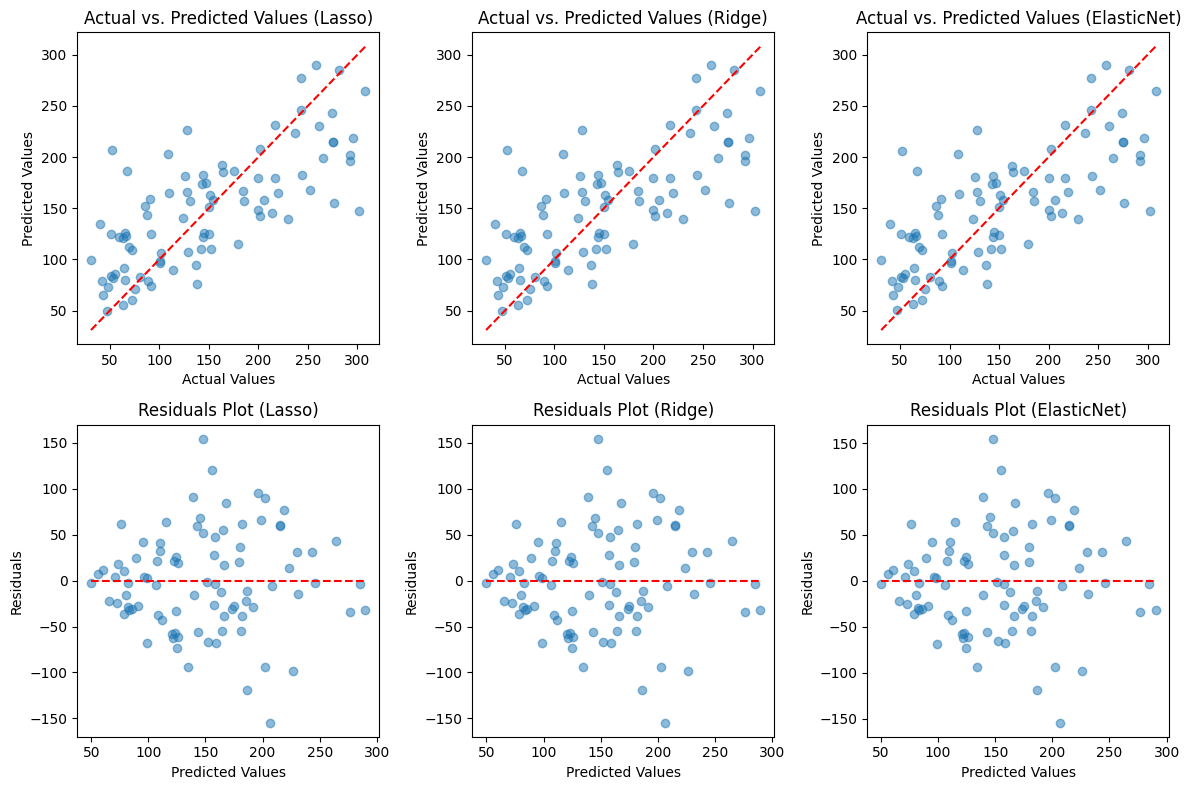

In [257]:
df = load_diabetes()
train_and_evaluate_models(df)
